In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/ambulance_routing_dataset1.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.columns)

Index(['Ambulance Latitude', 'Ambulance Longitude', 'Hospital Latitude',
       'Hospital Longitude', 'Traffic Level', 'Weather Type', 'Road Type',
       'Distance to Hospital', 'Traffic Speed', 'Time of Day',
       'Estimated Travel Time (Target)'],
      dtype='object')


In [5]:
df.head()

,Ambulance Latitude,Ambulance Longitude,Hospital Latitude,Hospital Longitude,Traffic Level,Weather Type,Road Type,Distance to Hospital,Traffic Speed,Time of Day,Estimated Travel Time (Target)
0,12.956638,77.626077,13.0,77.7,Moderate,Snowy,Main Road,9.349159,49.035258,Evening,11.439718
1,12.871174,77.845704,13.1,77.8,Low,Rainy,Highway,25.921695,81.070959,Morning,19.184449
2,12.904345,77.892298,12.9,77.6,Moderate,Rainy,Highway,31.685155,31.874026,Afternoon,59.644467
3,13.100339,77.989387,12.9,77.6,Low,Clear,Highway,47.708350,69.246106,Afternoon,41.338079
4,13.070092,77.769220,12.9,77.6,High,Foggy,Residential,26.341923,15.283910,Afternoon,103.410409


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


file_path = '/content/drive/MyDrive/ambulance_routing_dataset1.csv'
df = pd.read_csv(file_path)

df = df.dropna()


label_encoder = LabelEncoder()


df['Traffic Level'] = label_encoder.fit_transform(df['Traffic Level'])
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])
df['Road Type'] = label_encoder.fit_transform(df['Road Type'])
df['Time of Day'] = label_encoder.fit_transform(df['Time of Day'])


X = df[['Ambulance Latitude', 'Ambulance Longitude', 'Hospital Latitude', 'Hospital Longitude',
        'Traffic Level', 'Weather Type', 'Road Type', 'Distance to Hospital', 'Traffic Speed', 'Time of Day']]
y = df['Estimated Travel Time (Target)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


stacking_model = StackingRegressor(
    estimators=[('rf', rf_model)],
    final_estimator=gb_model
)


stacking_model.fit(X_train, y_train)


y_pred = stacking_model.predict(X_test)

# Calculate evaluation metrics
def evaluate_routing(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

mae, mse, rmse, r2 = evaluate_routing(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.2557604013282399
Mean Squared Error (MSE): 0.20166664164331752
Root Mean Squared Error (RMSE): 0.4490730916491407
R-squared (R²): 0.9998345786786625


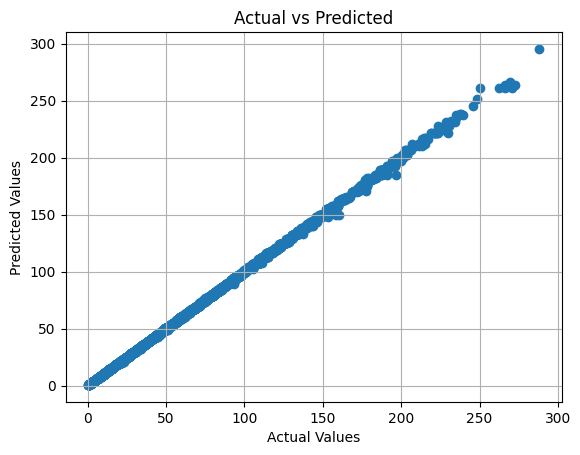

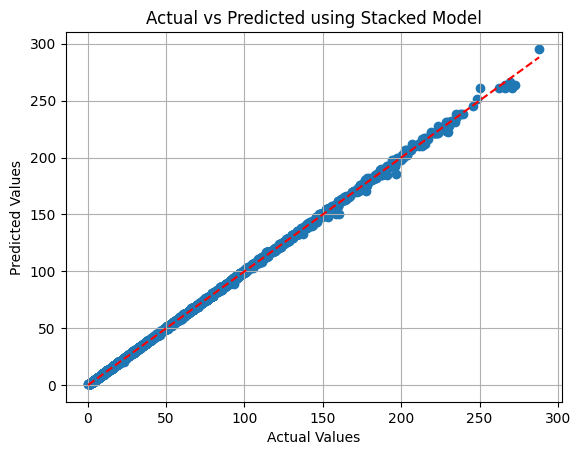

In [10]:
import numpy as np
import matplotlib.pyplot as plt


y_pred = stacking_model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='r')  # Ideal case line (y = x)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted using Stacked Model')
plt.grid(True)
plt.show()
